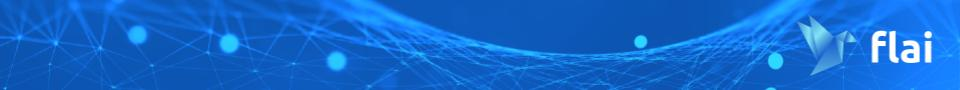

# **Aula 1 -Preparando o ambiente para utilizar o PySpark**

## **Instalando o Java**

O Apache Spark depende de outros sistemas, portanto, antes do Spark é preciso instalar as dependências. Primeiro, deve-se instalar o java

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

## **Instalando o Apache Spark**

Em seguida, é preciso fazer o download do Spark, e, também, do hadoop, pois o Apache Spark roda sob o HDFS, em sua máquina (no caso aqui, na máquina virtual do Google Colab que você está usando.

In [2]:
# Fazendo download
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Descompactando os arquivos
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

## **Configurando o ambiente**

Pronto! Agora precisamos dizer para o sistema onde encontrar o Java e o Spark, que instalamos a pouco neste ambiente.

In [3]:
# Importando a biblioteca os
import os

# Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

A seguir, vamos precisar da biblioteca findspark que vai nos permitir importar pacotes necessários para o funcionamento do pyspark



In [4]:
# instalando a findspark
!pip install -q findspark

In [5]:
#importando a findspark
import findspark

# iniciando o findspark
findspark.init()

## **Primeiros passos no Apache Spark com PySpark**

Tudo certo até aqui? Ótimo, então agora vamos abrir um sessão Spark para poder trabalhar com este FrameWork.

In [6]:
# importando o pacote necessário
from pyspark.sql import SparkSession

# iniciando o spark context
sc = SparkSession.builder.master('local[*]').getOrCreate()

# Verificando se a sessão foi criada
sc

In [7]:
# download de um conjunto de dados aberto
# fonte: https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda
!wget --verbose --show-progress --no-check-certificate https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/dados-abertos-precos-2021-12-glp.csv

--2022-09-29 19:41:01--  https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/dados-abertos-precos-2021-12-glp.csv
Resolving www.gov.br (www.gov.br)... 161.148.164.31
Connecting to www.gov.br (www.gov.br)|161.148.164.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2623526 (2.5M) [text/csv]
Saving to: ‘dados-abertos-precos-2021-12-glp.csv’

dados-abertos-preco 100%[===================>]   2.50M   368KB/s    in 11s     

2022-09-29 19:41:13 (234 KB/s) - ‘dados-abertos-precos-2021-12-glp.csv’ saved [2623526/2623526]



In [8]:
 # carregando um conjunto de dados que baixamos da internet
precogas = sc.read.csv("/content/dados-abertos-precos-2021-12-glp.csv", 
                       inferSchema=True, header=True,
                       sep = ';', 
                       encoding = "UTF-8")

In [9]:
# Verificando o tipo de objeto criado
type(precogas)

pyspark.sql.dataframe.DataFrame

In [12]:
# Espiando o dataset
precogas.show(20)

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 k

In [ ]:
# Verificando o schema() deste sparkdataframe
precogas.printSchema()

root
 |-- Regiao - Sigla: string (nullable = true)
 |-- Estado - Sigla: string (nullable = true)
 |-- Municipio: string (nullable = true)
 |-- Revenda: string (nullable = true)
 |-- CNPJ da Revenda: string (nullable = true)
 |-- Nome da Rua: string (nullable = true)
 |-- Numero Rua: string (nullable = true)
 |-- Complemento: string (nullable = true)
 |-- Bairro: string (nullable = true)
 |-- Cep: string (nullable = true)
 |-- Produto: string (nullable = true)
 |-- Data da Coleta: string (nullable = true)
 |-- Valor de Venda: string (nullable = true)
 |-- Valor de Compra: string (nullable = true)
 |-- Unidade de Medida: string (nullable = true)
 |-- Bandeira: string (nullable = true)



In [13]:
# Contando o número de linhas do dataset
precogas.count()

15765

In [14]:
# Listando as colunas do dataset
precogas.columns

['Regiao - Sigla',
 'Estado - Sigla',
 'Municipio',
 'Revenda',
 'CNPJ da Revenda',
 'Nome da Rua',
 'Numero Rua',
 'Complemento',
 'Bairro',
 'Cep',
 'Produto',
 'Data da Coleta',
 'Valor de Venda',
 'Valor de Compra',
 'Unidade de Medida',
 'Bandeira']

In [15]:
# Contando o número de colunas do dataset
len(precogas.columns)

16

In [16]:
# Método para verificar o tipo dos atributos do dataset
precogas.dtypes

[('Regiao - Sigla', 'string'),
 ('Estado - Sigla', 'string'),
 ('Municipio', 'string'),
 ('Revenda', 'string'),
 ('CNPJ da Revenda', 'string'),
 ('Nome da Rua', 'string'),
 ('Numero Rua', 'string'),
 ('Complemento', 'string'),
 ('Bairro', 'string'),
 ('Cep', 'string'),
 ('Produto', 'string'),
 ('Data da Coleta', 'string'),
 ('Valor de Venda', 'string'),
 ('Valor de Compra', 'string'),
 ('Unidade de Medida', 'string'),
 ('Bandeira', 'string')]

In [17]:
precogas.describe().show()

+-------+--------------+--------------+----------+--------------------+-------------------+-------------------+------------------+--------------------+---------------+---------+-------+--------------+------------------+---------------+-----------------+---------+
|summary|Regiao - Sigla|Estado - Sigla| Municipio|             Revenda|    CNPJ da Revenda|        Nome da Rua|        Numero Rua|         Complemento|         Bairro|      Cep|Produto|Data da Coleta|    Valor de Venda|Valor de Compra|Unidade de Medida| Bandeira|
+-------+--------------+--------------+----------+--------------------+-------------------+-------------------+------------------+--------------------+---------------+---------+-------+--------------+------------------+---------------+-----------------+---------+
|  count|         15765|         15765|     15765|               15765|              15765|              15765|             15765|                3786|          15764|    15765|  15765|         15765|        